In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_excel('Chapter3_Completions_DataSet.xlsx')

In [4]:
df.describe()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
count,144.000000,144.000000,144.000000,144.000000
mean,197.908333,39.713194,2949.275000,57.986111
std,28.411963,5.702597,1414.559452,37.618435
min,146.200000,26.000000,798.000000,5.000000
25%,173.400000,36.400000,1197.000000,15.000000
50%,193.800000,39.000000,3351.600000,65.000000
75%,217.600000,42.900000,4069.800000,90.000000
max,268.600000,57.200000,5506.200000,125.000000


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features= scaler.transform(df)

In [9]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

In [10]:
scaled_features=pd.DataFrame(scaled_features, columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])

In [11]:
scaled_features.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,-0.865617,1.018309,-1.299677,-1.280053
1,-1.105788,-0.125501,-1.299677,-1.280053
2,-1.345959,0.332023,-1.356287,-1.280053
3,-1.466045,0.103261,-1.243066,-1.280053
4,-0.985703,1.247071,-1.299677,-1.280053


In [12]:
from sklearn.decomposition import PCA

In [13]:
PCA= PCA(n_components=2)

In [14]:
PCA.fit(scaled_features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
Transformed_PCA=PCA.transform(scaled_features)

In [16]:
Transformed_PCA

array([[-2.20401503,  0.49230415],
       [-2.01847823, -0.65257072],
       [-2.3001967 , -0.3263588 ],
       [-2.23481144, -0.5804819 ],
       [-2.32844843,  0.65610591],
       [-2.01570154,  1.4935046 ],
       [-2.37840516,  0.05716489],
       [-2.17148144,  0.23678942],
       [-2.26829929, -1.09568622],
       [-2.12311515, -0.44880128],
       [-2.10815144,  1.05406075],
       [-2.26338126,  0.14507647],
       [-2.15628491, -0.70709925],
       [-2.56671864, -0.94403556],
       [-2.14337646,  1.8671572 ],
       [-2.20456595,  2.68214851],
       [-2.14710823,  1.48793811],
       [-2.12858409,  0.50028039],
       [-1.84194759,  1.41483116],
       [-2.2819054 ,  1.13273419],
       [-1.85627512,  0.42578182],
       [-2.1444168 ,  0.93035638],
       [-2.7093581 ,  0.46433027],
       [-1.75505189,  0.09969964],
       [-2.16482624,  0.14925134],
       [-1.89039914, -0.60323518],
       [-1.9877679 ,  0.25413354],
       [-2.10878761,  0.54024806],
       [-2.07958163,

In [17]:
scaled_features.shape

(144, 4)

In [18]:
Transformed_PCA.shape

(144, 2)

Text(0, 0.5, 'Second Principal Component')

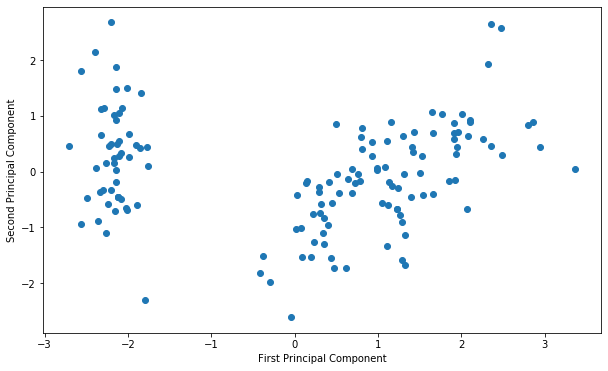

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(Transformed_PCA[:,0],Transformed_PCA[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [20]:
PCA.components_

array([[ 0.51942738, -0.27127608,  0.58031336,  0.56554477],
       [ 0.38765923,  0.91953234,  0.02458254,  0.05980205]])

In [21]:
df_components = pd.DataFrame(PCA.components_,columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])
df_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.519427,-0.271276,0.580313,0.565545
1,0.387659,0.919532,0.024583,0.059802


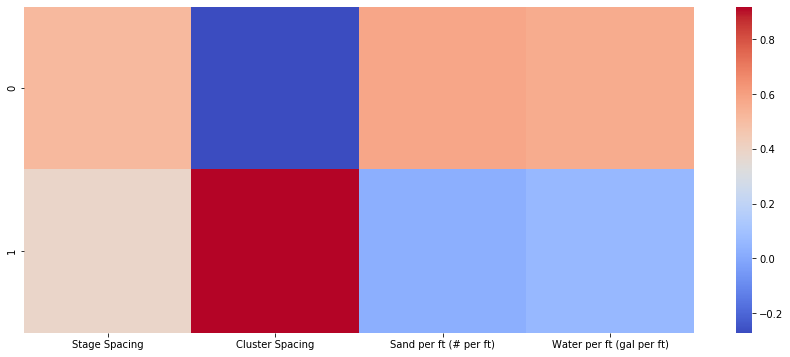

In [22]:
plt.figure(figsize=(15,6))
sns.heatmap(df_components,cmap='coolwarm')

In [23]:
transformed_PCA= pd.DataFrame(Transformed_PCA, columns=['First Principal Component', 'Second Principal Component'])

In [24]:
transformed_PCA.to_csv('Two Principal Components.csv')